# $\xi_{\rm mm}$ emulator

This notebook is used to create a figure for McClintock et al. (2019), which presents an emulator for the halo bias. This figure teases the $\xi_{\rm mm}$ emulator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ximm_emulator import *
%matplotlib inline

In [2]:
plt.rc("font", size=16, family="serif")
plt.rc("text", usetex=True)

### A simple example of how to call the emulator

In [3]:
#Define a cosmology. This is an array that has
#Omega_b*h^2, Omega_cdm*h^2, w_0, n_s, ln(10^10 * A_s), H0, N_eff
cosmology = np.array([ 2.32629e-02, 1.07830e-01, -7.26513e-01, 9.80515e-01, 
                      3.03895e+00, 6.32317e+01, 2.95000e+00])

In [4]:
#Make the emulator object
emu = ximm_emulator(cosmology)

CLASS is computing
	CLASS done


In [5]:
#Predict xi_mm.
#Note: the emulator outputs xi_mm at 10 redshifts.
#In the future you will be able to query the emulator for the curve at an arbitrary redshift.
xi_mm = emu.predict(cosmology) #Don't need to give the cosmology here, but just trying to be clear
#Note: the correlation function is at 50 specific radii between 0.1 and 75 Mpc/h.
radii = emu.get_radii()
redshifts = emu.get_redshifts()

Still need to add data


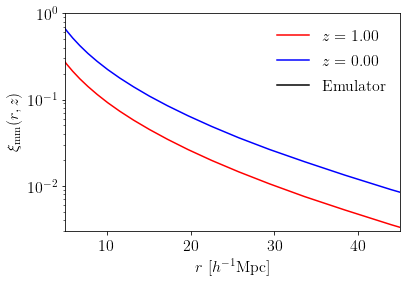

In [6]:
#Plot everything
c = ["r", "b"]
plt.xlim(5, 45)
for count, i in enumerate([2, 9]):
    plt.plot(radii, xi_mm[i], label=r"$z=%.2f$"%redshifts[i], c=c[count])
plt.plot([], [], c='k', label=r"Emulator")
plt.xlabel(r"$r\ [h^{-1}{\rm Mpc}]$")
plt.ylabel(r"$\xi_{\rm mm}(r,z)$")
plt.yscale("log")
plt.ylim(3e-3, 1)
plt.legend(loc=0, frameon=False)#, fontsize=7)
print("Still need to add data")